# Case Study: Erweiterung des Süßwarensortiments (Eigenmarke)

Ziel dieser Case-Study ist es, die Beliebtheit der am Markt erhältlichen Süßwaren hinsichtlich spezieller Charakterstika zu untersuchen. Dabei sollen die Auswirkungen der Charakteristika hinstilich Beliebheit analysiert werden um aufbauend darauf Handlungsempfehlungen für die Erweiterung des Süßwarensortiments zu entwickeln.

Der Datensatz wird [hier](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) zur Verfügung gestellt.

Die Story hinter diesen Daten kann [hier](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking)
gefunden werden

Der vorleigende Datensatz enthält Informationen über die Beliebtheit und Charaktersitika von Süßigkeiten zu Halloween im US-Amerikanischen Markt. Daher lassen sich nur bedingt Rückschlüsse für ein ganzjähriges Einzelhandelsgeschäft in Deutschland ziehen. 
Daher gilt folgende Annahme: Der Datensatz eignet sich für die nachfolgende Analyse und enthält kein BIAS aufgrund der Halloween spefizischen Umfrage im US-Amerikanischen Markt.  

Zunächst erfolgt die Einbindung der benötigten Bibliotheken, sowie das Einlesen des Datensatzes:

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


candy = pd.read_csv("candy-data.csv")

`candy-data.csv` includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no

- chocolate | Does it contain chocolate?
- fruity | Is it fruit flavored?
- caramel | Is there caramel in the candy?
- peanutalmondy | Does it contain peanuts, peanut butter or almonds?
- nougat | Does it contain nougat?
- crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
- hard | Is it a hard candy?
- bar | Is it a candy bar?
- pluribus | Is it one of many candies in a bag or box?
- sugarpercent | The percentile of sugar it falls under within the data set.
- pricepercent | The unit price percentile compared to the rest of the set.
- winpercent | The overall win percentage according to 269,000 matchups.

Zum besseren Verständnis des Datensatzes werden nachfolgend einige simple deskriptive Analysen durchgeführt.


In [4]:
candy.sort_values(by="winpercent", ascending=False)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


In [5]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Eine Bereinigung des Datensatzes ist an dieser Stelle nicht nötig, da die Daten schon in bereinigter Form vorliegen.

Zu erkennen war weiterhin, dass die Variablen `sugarpercent`, `pricepercent` und `winpercent` in metrischer Form vorliegen, während alle anderen Variablen als kategoriale Variablen in dichotomer Form dargestellt sind (binärcodiert, siehe dazu auch Dummykodierung)

WARUM LINEARE MULTIPLE REGRESSION?

Im nächsten Schritt werden die metrischen und binaärcordierten Variablen für nachvolgende Analysen in seperaten Listen gespeichert. Weiterhin wird ein DataFrame mit allen unabhängigen Variablen (`candy_ratio`) sowie ein DataFrame mit der abhängigen Variable (`candy_target`) erstellt

In [91]:
cols_ratio = ["sugarpercent", "pricepercent"]
cols_ratio_bin = ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
cols_target = ["winpercent"]
testee = ["chocolate"]

candy_ratio = candy.loc[:,cols_ratio + cols_ratio_bin]
candy_target = candy.loc[:,cols_target]


In [ ]:
Für die metrisch skalierten Variablen eignet sich die Darstellung als scatterplot um einen ersten Eindruck zu erlangen 
und eventuelle linearen oder sonstige Zusammenhänge erkennen zu können.

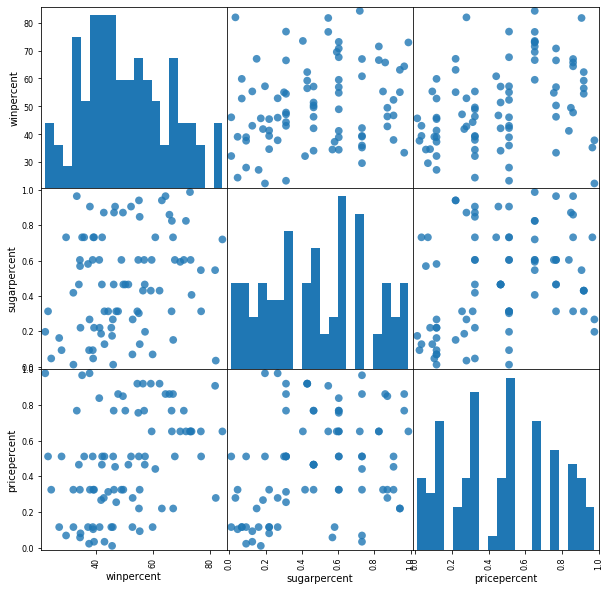

In [220]:
grr = pd.plotting.scatter_matrix(candy[cols_target + cols_ratio]
                                 ,figsize=(10, 10)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()

Anhand des scatterplots lassen sich keine linearen oder sonstigen Zusammenhänge zwischen `winpercent` und `pricepercent` oder `sugarpercent` erkennen.

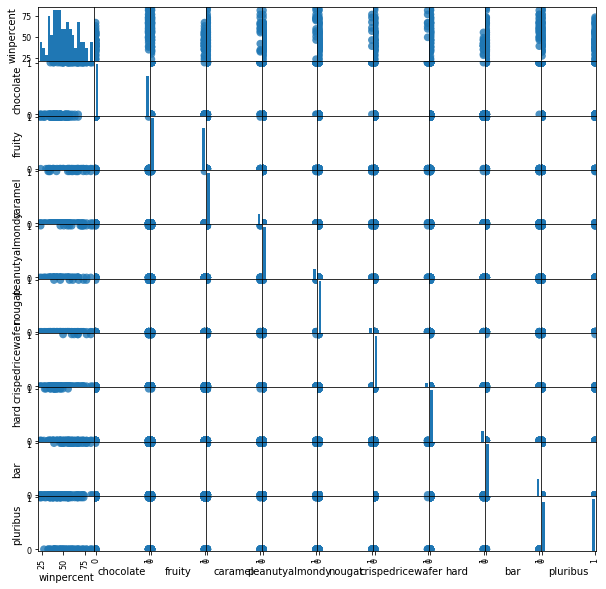

In [221]:
grr = pd.plotting.scatter_matrix(candy[cols_target + cols_ratio_bin]
                                 ,figsize=(10, 10)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()

In [23]:
## Korrelationsanalyse:

In [222]:
from scipy.stats import pearsonr
liste = ["pricepercent","sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
X = candy_ratio[["pricepercent","sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]]
y = candy["winpercent"]

i=0
corr_count = {}
for index in liste:
    corr, p = pearsonr(y, X[index])
    corr_count[index]=corr

keys_sort = sorted(corr_count, key=corr_count.get, reverse=True)    
    
for i in keys_sort:
    print("Korrelationskoeffizient", i)
    print(corr_count[i],"\n")

Korrelationskoeffizient chocolate
0.6365167485397069 

Korrelationskoeffizient bar
0.42992932818934865 

Korrelationskoeffizient peanutyalmondy
0.40619220218098284 

Korrelationskoeffizient pricepercent
0.3453254099676849 

Korrelationskoeffizient crispedricewafer
0.32467965137668436 

Korrelationskoeffizient sugarpercent
0.22915065712800656 

Korrelationskoeffizient caramel
0.21341629556767977 

Korrelationskoeffizient nougat
0.1993752988015668 

Korrelationskoeffizient pluribus
-0.24744786760290396 

Korrelationskoeffizient hard
-0.31038157535722827 

Korrelationskoeffizient fruity
-0.38093813706014334 



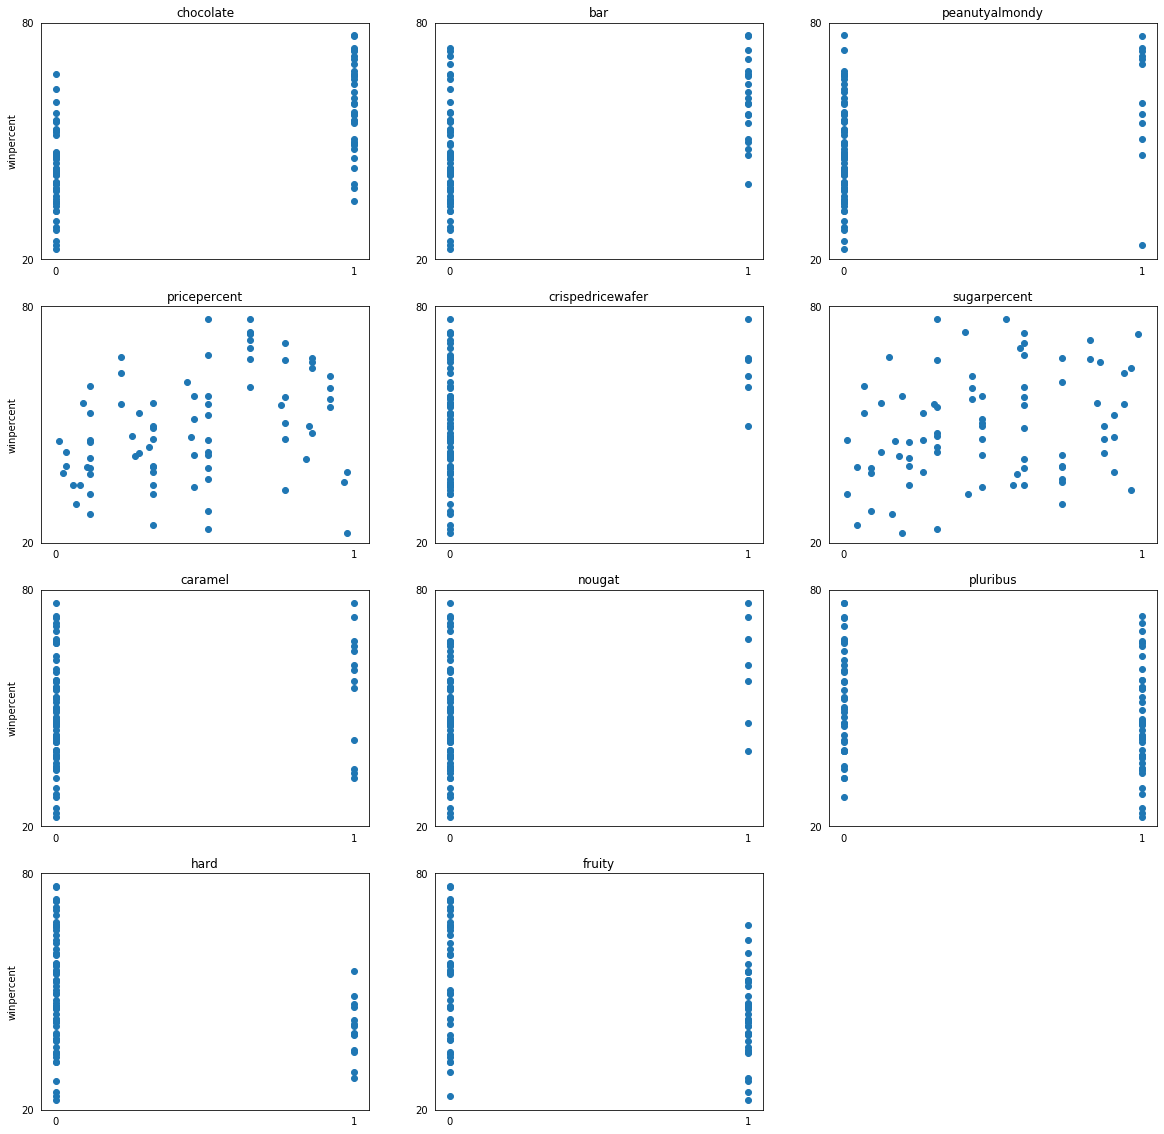

In [232]:
fig = plt.figure(figsize=(20,20))

#test_fit = np.polyfit(y, X["chocolate"], 1)



for i in range(11):
    ax = fig.add_subplot(4,3,i+1)
    ax.scatter(X[keys_sort[i]], y, color = 'tab:blue')  
    #if i==0:
        #plt.plot(test_fit[0]*y+test_fit[1], y)
    ax.set(title=keys_sort[i])
    ax.set_yticks([20,80])
    ax.set_xticks([0,1])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(20,80)
    ax.tick_params(bottom=False ,top=False, left=False, right=False)
    if (i==0 or i==3 or i==6 or i==9):
        ax.set(ylabel="winpercent")        
plt.show()




Im nächsten Schritt erfolgt die multivariate Regressionsanalyse (OLS). Dabei werden alle im Datensatz beschriebenen Variabeln berücksichtigt.

In [18]:

candy_ratio = candy.loc[:,cols_ratio + cols_ratio_bin]
candy_target = candy.loc[:,cols_target]
X = candy_ratio[["pricepercent","sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]]
X = sm.add_constant(X)
y = candy["winpercent"]

model = sm.OLS(y,X).fit()
#predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           9.50e-09
Time:                        11:27:56   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.5340      4.320      7.994      0.000      25.924      43.144
pricepercent        -5.9284      5.513     -1.075      0.286     -16.916       5.060
sugarpercent         9.0868      4.659      1.950      0.055      -0.200      18.373
chocolate           19.7481      3.899      5.065      0.000      11.978      27.518
fruity               9.4223      3.763      2.504      0.015       1.923      16.922
caramel              2.2245      3.657      0.608      0.545      -5.065       9.514
peanutyalmondy      10.0707      3.616      2.785      0.007       2.864      17.277
nougat               0.8043      5.716      0.141      0.888     -10.588      12.197
crispedricewafer     8.9190      5.268      1.693      0.095      -1.580      19.418
hard                -6.1653      3.455     -1.784      0.079     -13.051       0.721
bar                  0.4415      5.061      0.087      0.931      -9.645      10.528
pluribus            -0.8545      3.040     -0.281      0.779      -6.913       5.204
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.000
Skew:                          -0.104   Prob(JB):                        0.606
Kurtosis:                       2.511   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Statistisch signifikante Einflüsse bei nur bei: chocolate, fruity, peanutyalmondy  (p<0.05)

Regressionmodell nur mit diesen als signifikant erkannten Einflüssen:

In [54]:
X = candy_ratio[["chocolate", "fruity", "peanutyalmondy"]]
X = sm.add_constant(X)
#X["chock*fruity"] = candy_ratio["chocolate"]*candy_ratio["fruity"]
#X["chock*nuts"] = candy_ratio["chocolate"]*candy_ratio["peanutyalmondy"]
#X["nuts*fruity"] = candy_ratio["peanutyalmondy"]*candy_ratio["fruity"]
model = sm.OLS(y,X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     23.68
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           4.21e-11
Time:                        18:57:07   Log-Likelihood:                -321.89
No. Observations:                  85   AIC:                             651.8
Df Residuals:                      81   BIC:                             661.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             35.7883      3.237     11.057      0.000      29.348      42.228
chocolate         21.9834      3.599      6.108      0.000      14.822      29.145
fruity             7.7530      3.625      2.139      0.035       0.541      14.965
peanutyalmondy     9.0659      3.520      2.576      0.012       2.063      16.069
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.670
Skew:                          -0.087   Prob(JB):                        0.715
Kurtosis:                       2.602   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Schlussfolgerungen:

Insbesondere für die Charakteristika `chocolate` `peanutyalmondy` und `fruity` kann ein positver Einfluss auf die Beliebtheit der Süßware statistisch bewiesen werden. Dabei weist die Charakteristika `chocolate` den mit Abstand größten postiven Einfluss auf.

Hier BAR Diagramm einfügen mit prozentualen zu erwartenden Steigerung

Aus diesen 3 Charakteristika lässt sich nur schwer eine konkrete Empfehlung für die neue Süßigkeit ableiten.
Aus diesem Grund

IDEE: Variablen kategorisieren in Inhalt und FORM/Verpackung
-->eine konkrete Sußware sollte dabei 1 oder 2 (nicht zu viele!!) Inhaltsstoffe aufweisen und ein Merkmal bei Form/Verpackung annehmen


Auch wenn kein signifikanter Einfluss auf die Beliebtheit festzustellen ist, sollte der Zuckergehalt nicht ignoriert werden, aufgrund möglicher politischer Einflussnahme, Stichwort [Zuckersteuer](https://www.tagesspiegel.de/politik/auch-spd-experte-lauterbach-will-abgaben-auf-suesses-kinderaerzte-draengen-auf-zuckersteuer/25092246.html) (wurde zb bereits in GB für Getränke eingeführt)
"Dabei plädierte Lauterbach für eine schrittweise Einführung. Anfangen könne man mit einer Abgabe auf Süßigkeiten und andere zuckerhaltige Waren..."
--> der löffel weniger zucker


einarbeiten:

Sortimentsgestaltung
Wir setzen auf eine nachhaltigere Sortimentsgestaltung. Dafür stehen u.a. ein wachsender Anteil an Biolebensmitteln sowie der Lidl-Haltungskompass. Bei der Gestaltung des Sortiments wollen wir eine Sogwirkung für die Branche erzielen, wie z.B. durch Verzicht auf gentechnisch veränderte Organismen (GVO). Die Einführung GVO-freier Milchprodukte oder die Ankündigung der Reduktion von Zucker und Salz in unseren Eigenmarken setzten Standards für die gesamte Branche.




Weitere Daten erheben um zu weiterführenden Erkentnissen zu gelangen, denkbar wäre Z.b. Fettgehalt,Kaloriengehalt
genauer: Fruchtgehalt


Signifikante Einflüsse auf die Beliebheit von Sußwaren konnte 

# ZUSATZ

## Regression mit machine learning für jeweils einen Faktor:

------ Lineare Regression -----
Funktion via sklearn: y = 18.900 * x + 41.624
Alpha: [41.62443634]
Beta: [18.89957595]
Training Set R² Score: 0.42
Test Set R² Score: 0.35




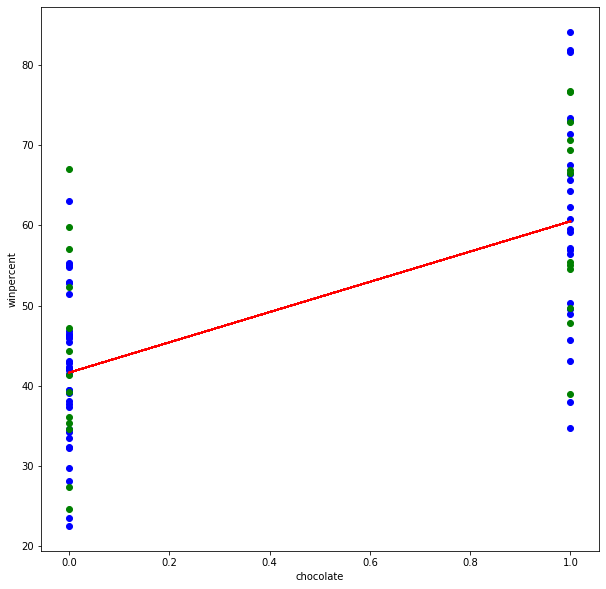

In [163]:
X = candy_ratio[["chocolate"]]
y = candy[cols_target]


 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,     # 70% der Daten für das Training
                                                    random_state = 42) # bei Bedarf kann hier "dem Zufall auf die Sprünge geholfen" werden

from sklearn.linear_model import LinearRegression   # importieren der Klasse
 
lr = LinearRegression()                             # instanziieren der Klasse
 
lr.fit(X_train, y_train)                            # trainieren

print('------ Lineare Regression -----')
print('Funktion via sklearn: y = %.3f * x + %.3f' % (lr.coef_[0], lr.intercept_))
print("Alpha: {}".format(lr.intercept_))
print("Beta: {}".format(lr.coef_[0]))
print("Training Set R² Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set R² Score: {:.2f}".format(lr.score(X_test, y_test)))
print("\n")

plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = 'blue')                 # Blaue Punkte sind Trainingsdaten
plt.scatter(X_test, y_test, color = 'green')                  # Grüne Punkte sind Testdaten
plt.plot(X_train, lr.predict(X_train), color = 'red')         # Hier ensteht die Gerade (x, y) = (x, lr.predict(x)
plt.xlabel(X_train.columns[0])
plt.ylabel(cols_target[0])
plt.show()



